In this notebook, we will load all the models and compare their performance accordingly 

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,f1_score, precision_score, recall_score
import joblib

In [15]:
df = pd.read_csv('../data/processed_data.csv')
X = df.drop('Churn',axis=1)
y = df['Churn']
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3,stratify=y, random_state=42)

In [16]:
RF = joblib.load('../models/best_rf_model_AS.pkl')
LG = joblib.load('../models/best_log_reg_model_AS.pkl')
XGB = joblib.load('../models/best_xgb_model_AS.pkl')

In [17]:
def compare_models(models, y_true_list, y_pred_list, model_names=None, average='binary'):
    """
    Compare multiple classification models using confusion matrices and metrics.
    
    Parameters:
        models: list of model objects (can be None if names are provided)
        y_true_list: list of arrays of true values (one per model)
        y_pred_list: list of arrays of predicted values (one per model)
        model_names: list of model names (optional, used instead of model.__class__.__name__)
        average: 'binary', 'macro', 'micro', or 'weighted' (for multi-class settings)
    """
    num_models = len(y_pred_list)
    
    if model_names is None:
        model_names = [type(m).__name__ for m in models]

    plt.figure(figsize=(6 * num_models, 5))

    for i in range(num_models):
        y_true = y_true_list[i]
        y_pred = y_pred_list[i]
        cm = confusion_matrix(y_true, y_pred)
        
        # Plot Confusion Matrix
        plt.subplot(1, num_models, i + 1)
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
        plt.title(f'Confusion Matrix: {model_names[i]}')
        plt.xlabel('Predicted')
        plt.ylabel('Actual')

        # Print metrics
        print(f"\nModel: {model_names[i]}")
        print(f"Accuracy:  {accuracy_score(y_true, y_pred):.4f}")
        print(f"Precision: {precision_score(y_true, y_pred, average=average):.4f}")
        print(f"Recall:    {recall_score(y_true, y_pred, average=average):.4f}")
        print(f"F1 Score:  {f1_score(y_true, y_pred, average=average):.4f}")
        print(f"\nClassification Report:\n{classification_report(y_true, y_pred)}")

    plt.tight_layout()
    plt.show()


Model: RandomForestClassifier
Accuracy:  0.7866
Precision: 0.5655
Recall:    0.8467
F1 Score:  0.6781

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.76      0.84      1552
           1       0.57      0.85      0.68       561

    accuracy                           0.79      2113
   macro avg       0.75      0.81      0.76      2113
weighted avg       0.84      0.79      0.80      2113


Model: XGBClassifier
Accuracy:  0.8197
Precision: 0.6203
Recall:    0.8271
F1 Score:  0.7089

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.82      0.87      1552
           1       0.62      0.83      0.71       561

    accuracy                           0.82      2113
   macro avg       0.77      0.82      0.79      2113
weighted avg       0.85      0.82      0.83      2113


Model: LogisticRegression
Accuracy:  0.7511
Precision: 0.5223
Recall:    0.7308
F1 Score:  0.6092

C

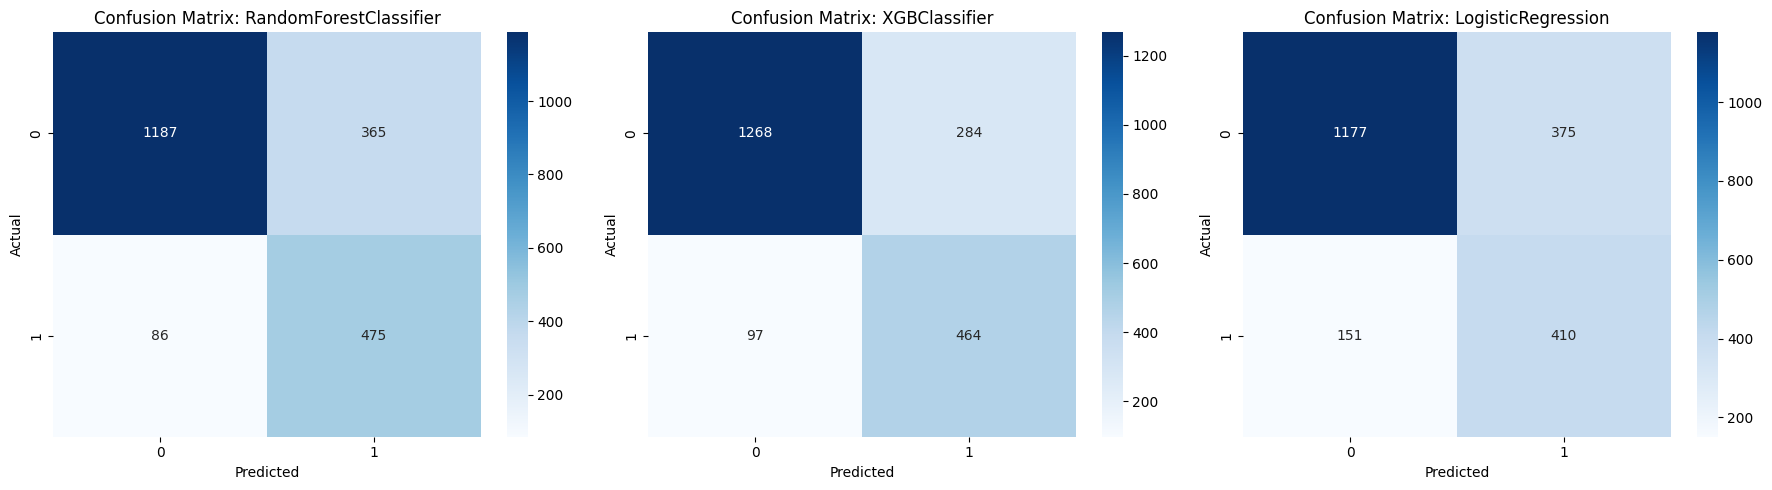

In [18]:
models = [RF, XGB, LG]

y_true = y_test
y_preds = [model.predict(X_test) for model in models]

compare_models(models=models, y_true_list=[y_true]*3, y_pred_list=y_preds)

After analysing the data and comparing the performace of each model individually we have come to a conclusion that XGBoost has the best performace ratings out of all three and therefore it would be the best model for further research